In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json manually when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shashikantkamble","key":"20a3c14460e42ffe12a927bebaf31171"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets list -s "IAM handwriting"


ref                                                     title                                           size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------  ----------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
tejasreddy/iam-handwriting-top50                        IAM Handwriting Top50                      196047805  2018-06-30 03:08:05.780000          12982        184  0.8125           
naderabdalghani/iam-handwritten-forms-dataset           IAM Handwritten Forms Dataset             4625755276  2021-01-13 00:10:50.383000          10855         83  0.8125           
nibinv23/iam-handwriting-word-database                  iam_handwriting_word_database             1184020415  2021-05-18 11:29:08.380000           7814         36  0.5              
dattrinh12/iam-handwriting-dataset                      IAM Handwriting Dataset           

In [5]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d tejasreddy/iam-handwriting-top50

# Extract the dataset
!unzip iam-handwriting-top50.zip -d /content/iam_dataset


cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/tejasreddy/iam-handwriting-top50
License(s): CC-BY-NC-SA-4.0
Archive:  iam-handwriting-top50.zip
  inflating: /content/iam_dataset/data_subset/data_subset/a01-000u-s00-00.png  
  inflating: /content/iam_dataset/data_subset/data_subset/a01-000u-s00-01.png  
  inflating: /content/iam_dataset/data_subset/data_subset/a01-000u-s00-02.png  
  inflating: /content/iam_dataset/data_subset/data_subset/a01-000u-s00-03.png  
  inflating: /content/iam_dataset/data_subset/data_subset/a01-000u-s01-00.png  
  inflating: /content/iam_dataset/data_subset/data_subset/a01-000u-s01-01.png  
  inflating: /content/iam_dataset/data_subset/data_subset/a01-000u-s01-02.png  
  inflating: /content/iam_dataset/data_subset/data_subset/a01-000u-s01-03.png  
  inflating: /content/iam_dataset/data_subset/data_subset/a01-003u-s00-00.png  
  inflating: /content/iam_dataset/data_subset/data_subset/a01-003u-s00-01.png  
 

In [6]:
!ls /content/iam_dataset


data_subset  forms_for_parsing.txt


In [7]:
!ls -R /content/iam_dataset


/content/iam_dataset:
data_subset  forms_for_parsing.txt

/content/iam_dataset/data_subset:
data_subset

/content/iam_dataset/data_subset/data_subset:
 a01-000u-s00-00.png   c03-007a-s01-02.png   g06-018o-s02-00.png        h06-003-s00-02.png
 a01-000u-s00-01.png   c03-007a-s01-03.png   g06-018o-s02-01.png        h06-003-s01-00.png
 a01-000u-s00-02.png   c03-007a-s01-04.png   g06-018o-s02-02.png        h06-003-s01-01.png
 a01-000u-s00-03.png   c03-007a-s01-05.png   g06-018o-s02-03.png        h06-003-s01-02.png
 a01-000u-s01-00.png   c03-007b-s00-00.png   g06-018o-s02-04.png        h06-003-s01-03.png
 a01-000u-s01-01.png   c03-007b-s00-01.png   g06-018p-s00-00.png        h06-003-s02-00.png
 a01-000u-s01-02.png   c03-007b-s00-02.png   g06-018p-s00-01.png        h06-003-s02-01.png
 a01-000u-s01-03.png   c03-007b-s01-00.png   g06-018p-s01-00.png        h06-003-s02-02.png
 a01-003u-s00-00.png   c03-007b-s01-01.png   g06-018p-s01-01.png        h06-003-s02-03.png
 a01-003u-s00-01.png   c03-007

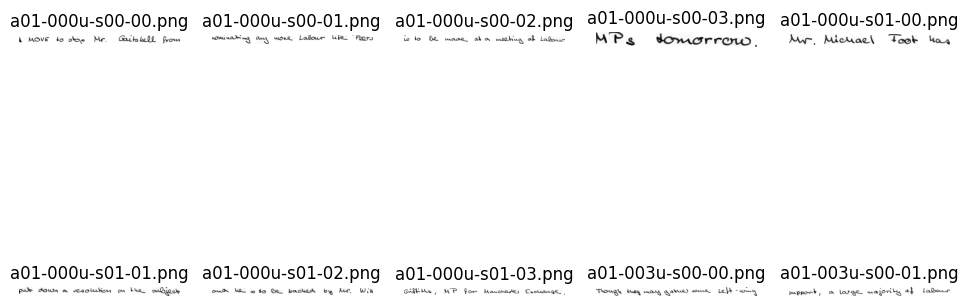

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

dataset_path = "/content/iam_dataset/data_subset/data_subset"  # Adjust path if needed
img_files = sorted(os.listdir(dataset_path))[:10]  # First 10 images

plt.figure(figsize=(12, 6))
for i, img_file in enumerate(img_files):
    img_path = os.path.join(dataset_path, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(img_file)

plt.show()


Processed image dataset shape: (4899, 32, 128)


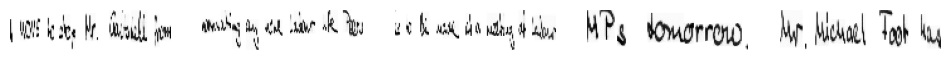

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "/content/iam_dataset/data_subset/data_subset"  # Adjust the path if needed

# Define fixed image size
IMG_WIDTH, IMG_HEIGHT = 128, 32

# Get image file names
img_files = sorted(os.listdir(dataset_path))

# Initialize list to store processed images
processed_images = []

for img_file in img_files:
    img_path = os.path.join(dataset_path, img_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale

    # Resize image
    img_resized = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

    # Normalize pixel values (0-1)
    img_normalized = img_resized / 255.0

    # Append to list
    processed_images.append(img_normalized)

# Convert to NumPy array
processed_images = np.array(processed_images)

# Check the shape of the dataset
print("Processed image dataset shape:", processed_images.shape)

# Visualize some preprocessed images
plt.figure(figsize=(12, 6))
for i in range(5):  # Show first 5 images
    plt.subplot(1, 5, i + 1)
    plt.imshow(processed_images[i], cmap="gray")
    plt.axis("off")
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Define input shape
input_shape = (32, 128, 1)  # (Height, Width, Channels)

# Encoder
input_layer = Input(shape=input_shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

# Decoder
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

# Build autoencoder model
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Print model summary
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 128, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 128, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 32, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 32, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 128, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 128, 1)          │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Reshape dataset for training
X_train = processed_images.reshape(-1, 32, 128, 1)

# Train the model
history = autoencoder.fit(
    X_train, X_train,  # Input = Output (since it's an autoencoder)
    epochs=50,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 71s 548ms/step - loss: 0.0599 - val_loss: 0.0334
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 63s 509ms/step - loss: 0.0415 - val_loss: 0.0334
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 63s 516ms/step - loss: 0.0412 - val_loss: 0.0334
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 83s 527ms/step - loss: 0.0408 - val_loss: 0.0233
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 83s 534ms/step - loss: 0.0230 - val_loss: 0.0144
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 83s 542ms/step - loss: 0.0158 - val_loss: 0.0122
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 79s 520ms/step - loss: 0.0138 - val_loss: 0.0108
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 87s 564ms/step - loss: 0.0118 - val_loss: 0.0097
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 84s 579ms/step - loss: 0.0094 - val_loss: 0.0074
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 79s 550ms/step - loss: 0.0081 - val_loss: 0.0068
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 66s 533ms/step - loss: 0.0074 - val_loss: 0.0063
Epoch 12/50
123/123

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


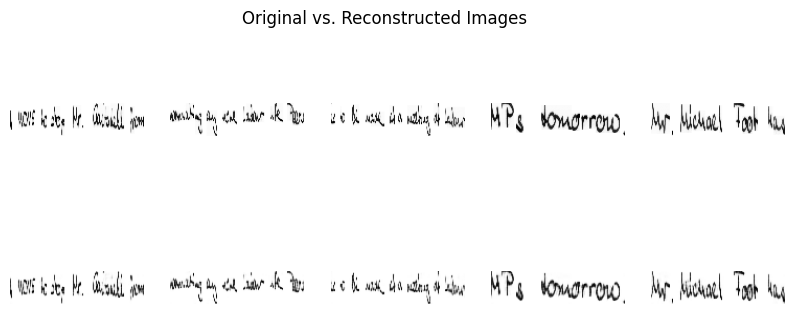

In [12]:
# Select some random test images
num_images = 5
test_images = X_train[:num_images]

# Get reconstructed images
reconstructed = autoencoder.predict(test_images)

# Plot original and reconstructed images
plt.figure(figsize=(10, 4))
for i in range(num_images):
    # Original
    plt.subplot(2, num_images, i + 1)
    plt.imshow(test_images[i].reshape(32, 128), cmap='gray')
    plt.axis('off')

    # Reconstructed
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed[i].reshape(32, 128), cmap='gray')
    plt.axis('off')

plt.suptitle("Original vs. Reconstructed Images")
plt.show()
